Firt name: Kamiar (Kamy)\
Last name: Asgari (Gary)\
USC ID: 4590556658\
Github Username: kamiarasgari

# Combined Cycle Power Plant Data Set

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import t
from sklearn.preprocessing import PolynomialFeatures
import random
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

random.seed(3)

## (a) Read the data

In [99]:
file_path = '../data/CCPP/Folds5x2_pp.ods'
data = pd.read_excel(file_path, engine="odf")

## (b-i) How many rows are in this data set? How many columns? What do the rows and columns represent?

In [100]:
num_rows = data.shape[0]
num_columns = data.shape[1]
my_dict = {"AT":"Temperature" , "AP":"Ambient Pressure" , "RH":"Relative Humidity" , "V":"Exhaust Vacuum" , "PE":"Net hourly electrical energy output"}
column_labels = data.columns.tolist()

print("Number of rows:", num_rows)
print("Rows represents 9568 data points collected from a Combined Cycle Power Plant over 6 years.")
print("Number of columns:", num_columns)
print("Column Labels:", column_labels)
for i in my_dict:
    print("Here, \""+i+"\" means \""+my_dict[i]+"\".")

Number of rows: 9568
Rows represents 9568 data points collected from a Combined Cycle Power Plant over 6 years.
Number of columns: 5
Column Labels: ['AT', 'V', 'AP', 'RH', 'PE']
Here, "AT" means "Temperature".
Here, "AP" means "Ambient Pressure".
Here, "RH" means "Relative Humidity".
Here, "V" means "Exhaust Vacuum".
Here, "PE" means "Net hourly electrical energy output".


## (b-ii) Pairwise scatterplots

### data preperation

In [101]:
raw_data = pd.DataFrame.to_numpy(data)
X_total = raw_data[:,0:4]
Y_total = raw_data[:,4]

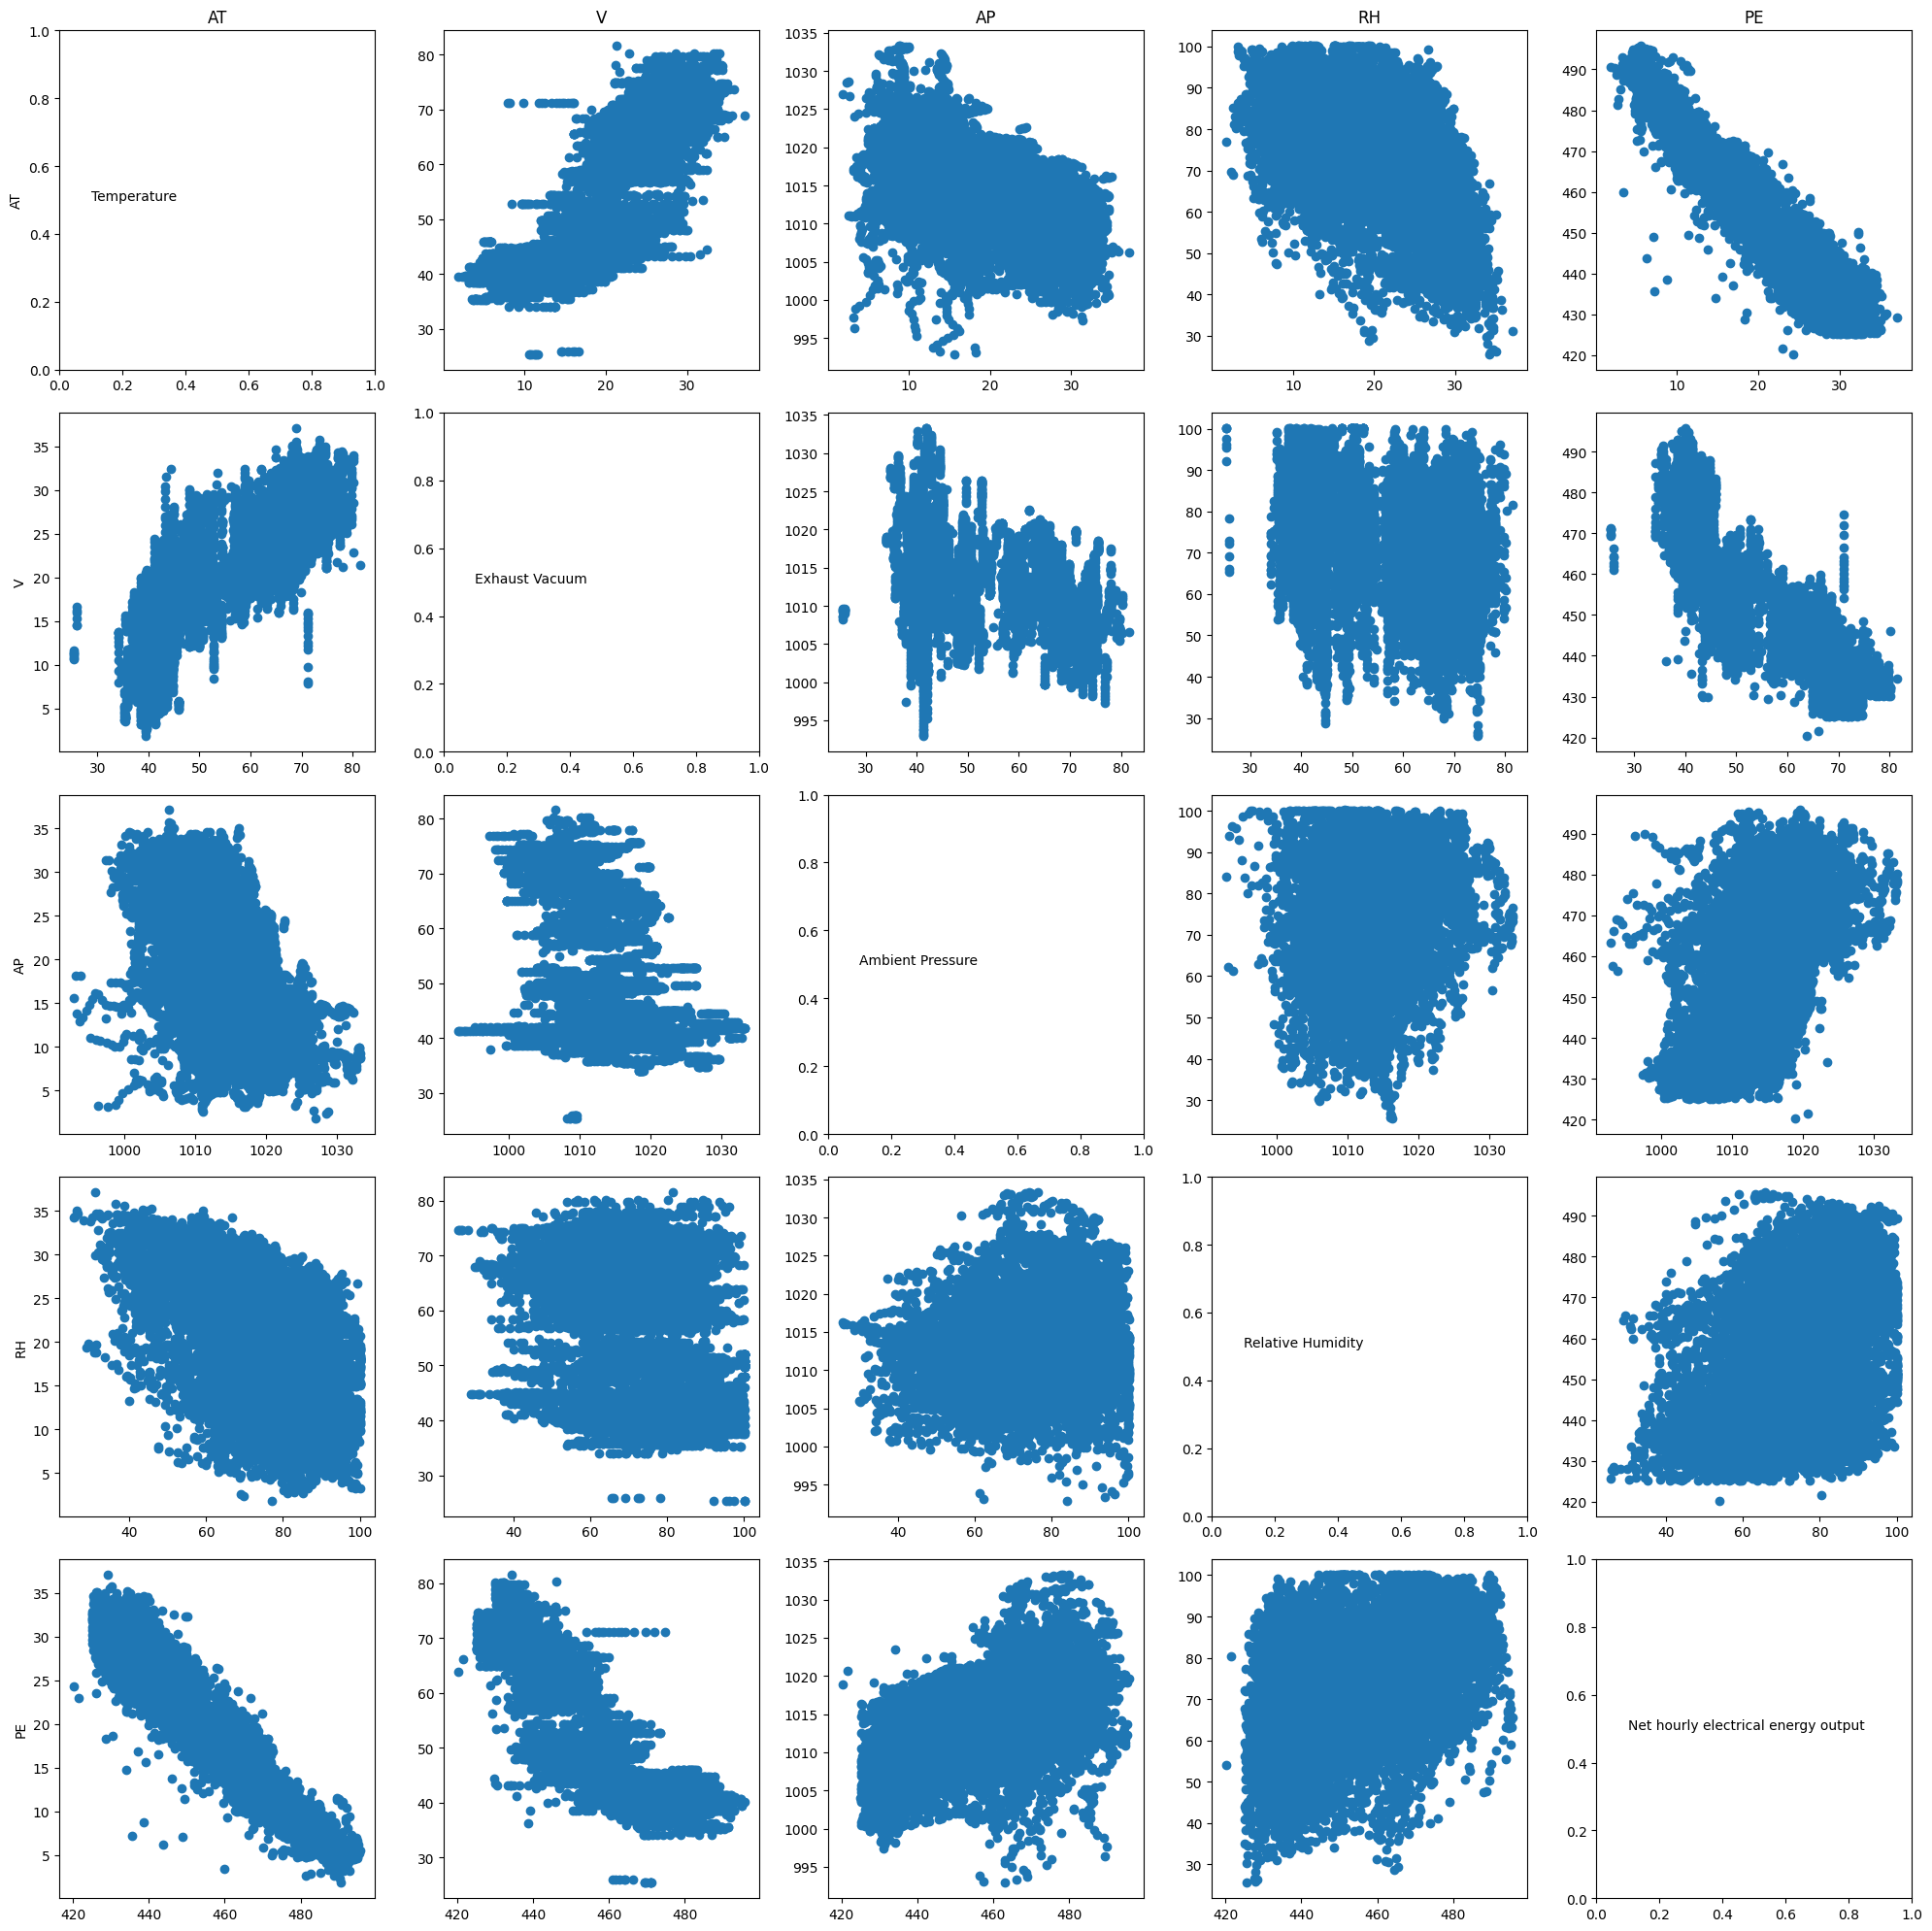

In [102]:
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
for i in range(5):
    for j in range(5):

        if i != j:
            axs[i,j].scatter(raw_data[:,i], raw_data[:,j])
        else:
            axs[i,j].text(0.1,0.5,s=my_dict[column_labels[i]], fontsize=10)


        if j==0 :
            axs[i,j].set_ylabel(column_labels[i])
        if i==0 :
            axs[i, j].set_title(column_labels[j])

plt.tight_layout()
plt.show()


### findings: 
1: The temperature is the best single predictor of the power output. \
2: The exhaust vacuum is the second-best predictor. \
3: Relative humidity is highly correlated with the rest of the variables.

## (b-ii) What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [103]:
summary_table = pd.DataFrame({
    'Variable': my_dict.keys(),
    'Mean': np.mean(raw_data,axis=0),
    'Median': np.median(raw_data,axis=0),
    'Range': np.ptp(raw_data,axis=0),
    'First Quartile': np.percentile(raw_data,axis=0,q=25),
    'Third Quartile': np.percentile(raw_data,axis=0,q=75),
    'Interquartile Range': np.percentile(raw_data,axis=0,q=75) - np.percentile(raw_data,axis=0,q=25)
})

print(summary_table)

  Variable         Mean    Median  Range  First Quartile  Third Quartile  \
0       AT    19.651231    20.345  35.30         13.5100           25.72   
1       AP    54.305804    52.080  56.20         41.7400           66.54   
2       RH  1013.259078  1012.940  40.41       1009.1000         1017.26   
3        V    73.308978    74.975  74.60         63.3275           84.83   
4       PE   454.365009   451.550  75.50        439.7500          468.43   

   Interquartile Range  
0              12.2100  
1              24.8000  
2               8.1600  
3              21.5025  
4              28.6800  


##  (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

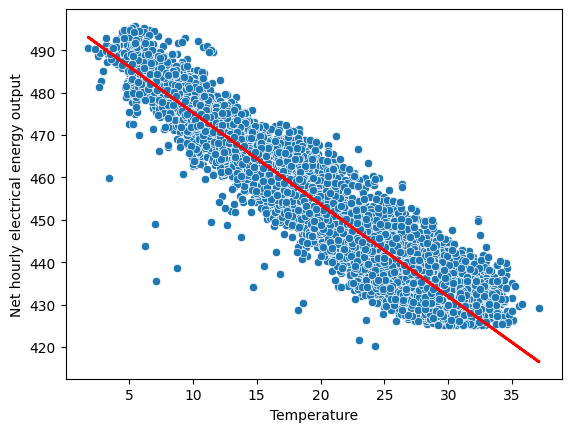

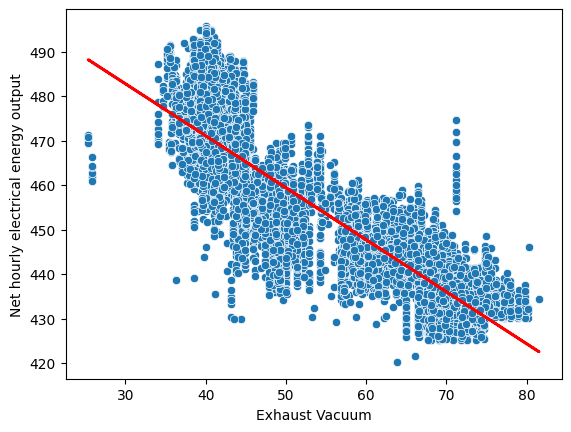

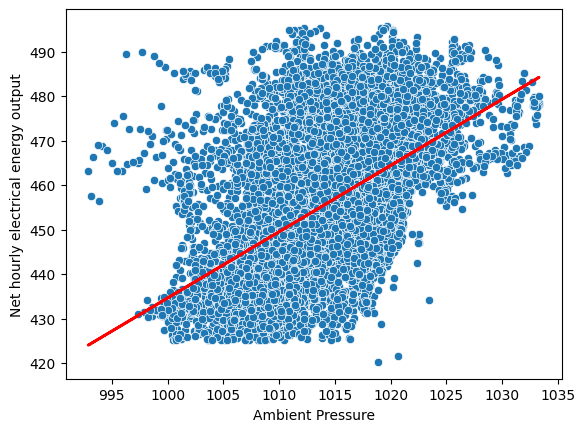

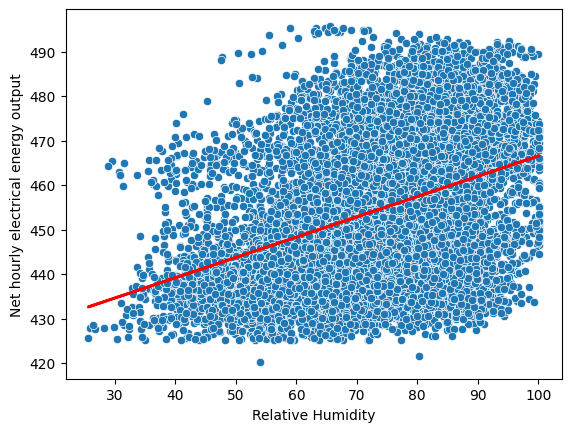

  Variable    Intercept  Coefficient  standard error  t-statistic  p-value
0       AT   497.034120    -2.171320        0.007443  -291.715195      0.0
1        V   517.801526    -1.168135        0.008060  -144.930012      0.0
2       AP -1055.260989     1.489872        0.030476    48.887249      0.0
3       RH   420.961766     0.455650        0.016577    27.486377      0.0


In [104]:
beta1 = []
beta0 = []
se = []
t_stat = []
p_value = []
y_pred = []

y = Y_total
for i in range(4):
    X = X_total[:,i]
    
    mean_X = np.mean(X)
    mean_y = np.mean(y)

    beta1.append(np.dot((X - mean_X),(y - mean_y)) / np.sum((X - mean_X) ** 2))
    beta0.append(mean_y - beta1[-1] * mean_X)

    y_pred.append(beta0[-1] + beta1[-1] * X)

    # Calculate the sum of squared residuals
    ssr = np.sum((y - y_pred) ** 2)
    
    # Calculate the standard error of the estimate
    n = len(X)
    df = n-2
    se.append(np.sqrt(ssr / df) / np.sqrt(np.sum((X - mean_X) ** 2)))

    # Calculate the t-statistic
    t_stat.append(beta1[-1] / se[-1])

    # Calculate the p-value
    p_value.append(2 * (1 - t.cdf(abs(t_stat[-1]), df)))
    
    sns.scatterplot(x=X, y=y)
    plt.plot(X, y_pred[-1], color='red', linewidth=2)
    plt.xlabel(my_dict[column_labels[i]])
    plt.ylabel(my_dict[column_labels[-1]])
    plt.show()

summary_table2 = pd.DataFrame({
    'Variable': column_labels[0:-1],
    'Intercept': beta0,
    'Coefficient': beta1,
    'standard error': se,
    't-statistic': t_stat,
    'p-value': p_value
})
print(summary_table2)



AT and V are clearly superior predictors. Each of the four variables has a very small p-value (of the Coefficient), indicating that the null hypothesis is false. There are a few outliers in the Graph of Temperature, but they do not significantly alter the outcome.

## (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [105]:
Xname = ['const']
Xname = Xname + column_labels[0:-1]
# Add a constant column to the predictors (for the intercept term)
X = sm.add_constant(X_total)

# Fit the multiple regression model
model = sm.OLS(Y_total, X)
results_d = model.fit()

# Print the summary of the regression results
print(results_d.summary(slim=True, yname=column_labels[-1], xname= Xname))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
No. Observations:                9568   F-statistic:                 3.114e+04
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150

Notes:
[1] Standard Errors assume that the covarian

Clearly, for all of the variables we can reject the null hypothesis.

## (e) How do your results from 1c compare to your results from 1d?

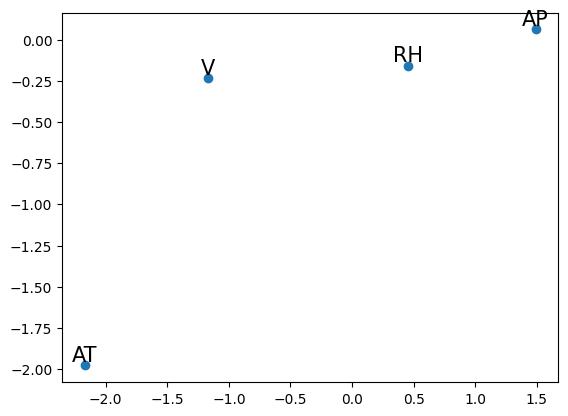

In [106]:
coefficients = results_d.params

plt.scatter(beta1 , coefficients[1:])
for i in range(4):
    plt.text(beta1[i], coefficients[i+1] , column_labels[i], ha='center', va='bottom', fontsize=15)
plt.show()



The AT has changed little. However, the remaining three have a greater coefficient.

## (f) Is there evidence of nonlinear association between any of the predictors and the response?

In [107]:
results_f = []
for i in range(4):
    
    # choose the data
    X = X_total[:,i]
    
    # create poly
    degree = 3
    poly_features = PolynomialFeatures(degree=degree)

    # Transform 
    X_poly = poly_features.fit_transform(X.reshape(-1, 1))

    # Fit the multiple regression model
    model = sm.OLS(y, X_poly)
    results_f.append(model.fit())

In [108]:
# create the names of the First feature
i = 0

X_n = column_labels[i]
X_name = ['const']
for p in [1,2,3]:
    X_name.append(X_n+'^'+str(p))
print(results_f[i].summary(yname=column_labels[-1], xname=X_name,slim=True))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
No. Observations:                9568   F-statistic:                 3.299e+04
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.000     491.409     494.047
AT^1          -0.6103      0.124     -4.941      0.000      -0.852      -0.368
AT^2          -0.1251      0.007    -18.199      0.000      -0.139      -0.112
AT^3           0.0027      0.000     22.594      0.000       0.002       0.003

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is lar

Clearly, the feature AT has considerable nonlinearity

In [109]:
# create the names of the second feature
i = 1

X_n = column_labels[i]
X_name = ['const']
for p in [1,2,3]:
    X_name.append(X_n+'^'+str(p))
print(results_f[i].summary(yname=column_labels[-1], xname=X_name,slim=True))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
No. Observations:                9568   F-statistic:                 1.098e+04
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.000     536.209     572.084
V^1           -2.1444      0.509     -4.214      0.000      -3.142      -1.147
V^2           -0.0027      0.009     -0.294      0.768      -0.021       0.015
V^3            0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is lar

The feature V has almost no nonlinearity. The coefficients of V^2 and V^3 are statistically insignificant.

In [110]:
# create the names of the third feature
i = 2

X_n = column_labels[i]
X_name = ['const']
for p in [1,2,3]:
    X_name.append(X_n+'^'+str(p))
print(results_f[i].summary(yname=column_labels[-1], xname=X_name,slim=True))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
No. Observations:                9568   F-statistic:                     1813.
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.000       0.057       0.092
AP^1          25.2556      3.001      8.415      0.000      19.372      31.139
AP^2          -0.0500      0.006     -8.439      0.000      -0.062      -0.038
AP^3        2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is lar

The feature AP has nonliniarity. Also, they have low p-values, but they are very small in size.

In [111]:
# create the names of the forth feature
i = 3

X_n = column_labels[i]
X_name = ['const']
for p in [1,2,3]:
    X_name.append(X_n+'^'+str(p))
print(results_f[i].summary(yname=column_labels[-1], xname=X_name,slim=True))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
No. Observations:                9568   F-statistic:                     579.2
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.000     447.744     489.083
RH^1          -1.7292      0.486     -3.557      0.000      -2.682      -0.776
RH^2           0.0321      0.007      4.433      0.000       0.018       0.046
RH^3          -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is lar

The feature RH has nonliniarity. Note that also they have low p-values, but they are very small in size. 

## (g) Is there evidence of association of interactions of predictors with the response?

In [112]:
# choose the data
X = X_total

# create poly
degree = 2
poly_features = PolynomialFeatures(degree=degree,interaction_only=True)

# Transform 
X_poly = poly_features.fit_transform(X)

# Tranfer the labels
Xname_array = poly_features.get_feature_names_out(column_labels[0:-1])
Xname = Xname_array.tolist()
Xname[0] = 'const'
# Fit the multiple regression model
model = sm.OLS(y, sm.add_constant(X_poly))
results_g = model.fit()

print(results_g.summary(xname=Xname, slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
No. Observations:                9568   F-statistic:                 1.405e+04
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
AT V           0.0210      0.001     23.338      0.0

The statistically significant interaction terms (with very small p-value):\
    1. AT * V \
    2. AT * RH \
    3. V * AP \
    4. AP * RH

However, we should notice that some of the simple linear terms are now insignificant (Only V remains significant.)       

## (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70%

deviding the data

In [113]:
# deviding the data

percentage = 0.7  # Select 70% of the data
Index_all = list(range(len(Y_total)))
random.shuffle(Index_all)  
sample_size = int(len(data) * percentage)
Index_train = Index_all[ : sample_size]
Index_test = Index_all[sample_size : ]

X_test = X_total[Index_test]
X_train = X_total[Index_train]
Y_test = Y_total[Index_test]
Y_train = Y_total[Index_train]

Fit the second order model

In [114]:
# create poly
degree = 2
poly_features = PolynomialFeatures(degree=degree)

# Transform 
X_train_poly = poly_features.fit_transform(X_train)

# Tranfer the labels
Xname_array = poly_features.get_feature_names_out(column_labels[0:-1])
Xname = Xname_array.tolist()
Xname[0] = 'const'

# Fit the multiple regression model
model = sm.OLS(Y_train, X_train_poly)
result_h1 = model.fit()

print(result_h1.summary(slim=True,xname=Xname))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
No. Observations:                6697   F-statistic:                     7410.
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7452.3346   1411.726     -5.279      0.000   -1.02e+04   -4684.900
AT            -2.9574      3.642     -0.812      0.417     -10.096       4.182
V             -4.5602      1.764     -2.585      0.010      -8.018      -1.102
AP            15.5159      2.738      5.667      0.000      10.148      20.884
RH             4.4772      1.037      4.319      0.000       2.445       6.509
AT^2           0.0144      0.004      4.085      0.0

Detecting and removing insignificants

In [115]:
p_values = result_h1.pvalues
significance_level = 0.05

# chooseing the terms that stay
Index_stay = np.argwhere(p_values<significance_level).flatten().tolist()

In [116]:
# Fit the corrected multiple regression model
model = sm.OLS(Y_train, X_train_poly[:,Index_stay])
result_h2 = model.fit()

Xname_stay = [Xname[i] for i in Index_stay]

print(result_h2.summary(slim=True,xname=Xname_stay))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
No. Observations:                6697   F-statistic:                     9530.
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.083e+04   1273.285     -8.508      0.000   -1.33e+04   -8336.991
V              6.8211      0.997      6.838      0.000       4.866       8.776
AP            21.0360      2.484      8.469      0.000      16.167      25.905
RH            11.9463      0.789     15.149      0.000      10.400      13.492
AT^2          -0.0068      0.002     -3.340      0.001      -0.011      -0.003
AT V           0.0040      0.002      2.557      0.0

Test on the test dataset

In [117]:
X_test_poly = poly_features.fit_transform(X_test)

# full model 
y_pred_test_1 = result_h1.predict(X_test_poly)
y_pred_train_1 = result_h1.predict(X_train_poly)

# corrected model
y_pred_test_2 = result_h2.predict(X_test_poly[:,Index_stay])
y_pred_train_2 = result_h2.predict(X_train_poly[:,Index_stay])


mse_full_test = mean_squared_error(Y_test, y_pred_test_1)
mse_corrected_test = mean_squared_error(Y_test, y_pred_test_2)
mse_full_train = mean_squared_error(Y_train, y_pred_train_1)
mse_corrected_train = mean_squared_error(Y_train, y_pred_train_2)

print("Mean Squared Error of the full model on the train data:", mse_full_train)
print("Mean Squared Error of the full model on the test data:", mse_full_test)
print("Mean Squared Error of the corrected model on the train data:", mse_corrected_train)
print("Mean Squared Error of the corrected model on the test data:", mse_corrected_test)

Mean Squared Error of the full model on the train data: 17.525106026933152
Mean Squared Error of the full model on the test data: 19.478549819012738
Mean Squared Error of the corrected model on the train data: 18.985992506775347
Mean Squared Error of the corrected model on the test data: 20.811772401738892


I was expecting to get a better test error, but it seems like removing insignificant terms, increased the test error (inaddition to the training error which always happens.)

## (i) KNN Regression

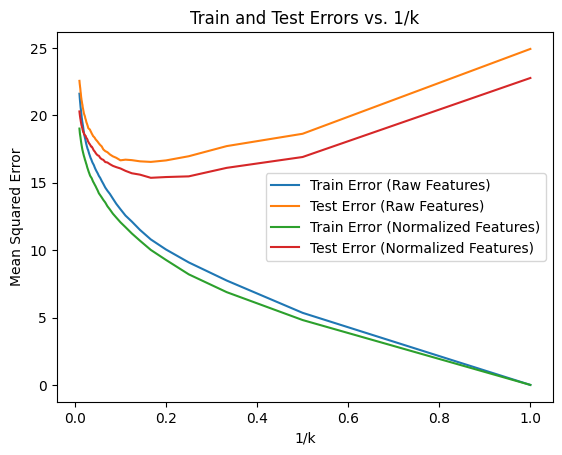

Best value of k (normalized features) on test dataset: 6
Best value of k (raw features) on test dataset : 6


In [118]:
k_values = range(1, 101)

train_errors_raw = []
test_errors_raw = []
train_errors_normalized = []
test_errors_normalized = []


for k in k_values:
    # Create and train k-nearest neighbor 
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_raw.fit(X_train, Y_train)
    
    train_error_raw = np.mean((Y_train - knn_raw.predict(X_train)) ** 2)
    test_error_raw = np.mean((Y_test - knn_raw.predict(X_test)) ** 2)
    
    train_errors_raw.append(train_error_raw)
    test_errors_raw.append(test_error_raw)
    
    # Create and train k-nearest neighbor regression models with normalized features
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    
    knn_normalized = KNeighborsRegressor(n_neighbors=k)
    knn_normalized.fit(X_train_normalized, Y_train)
    
    train_error_normalized = np.mean((Y_train - knn_normalized.predict(X_train_normalized)) ** 2)
    test_error_normalized = np.mean((Y_test - knn_normalized.predict(X_test_normalized)) ** 2)
    
    train_errors_normalized.append(train_error_normalized)
    test_errors_normalized.append(test_error_normalized)

plt.plot(1 / np.array(k_values), train_errors_raw, label='Train Error (Raw Features)')
plt.plot(1 / np.array(k_values), test_errors_raw, label='Test Error (Raw Features)')
plt.plot(1 / np.array(k_values), train_errors_normalized, label='Train Error (Normalized Features)')
plt.plot(1 / np.array(k_values), test_errors_normalized, label='Test Error (Normalized Features)')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors vs. 1/k')
plt.legend()
plt.show()

# Find the best value of k
Index_best_normalized = np.argmin(test_errors_normalized)
best_k_normalized = k_values[Index_best_normalized]
print("Best value of k (normalized features) on test dataset:", best_k_normalized)

Index_best_raw = np.argmin(test_errors_raw)
best_k_raw = k_values[Index_best_raw]
print("Best value of k (raw features) on test dataset :", best_k_raw)


## (j) Compare the results of KNN Regression with the linear regression model

First we train a linear regression on the test data.

In [119]:
Xname = ['const']
Xname = Xname + column_labels[0:-1]
# Add a constant column to the predictors (for the intercept term)
X = sm.add_constant(X_train)

# Fit the multiple regression model
model = sm.OLS(Y_train, X)
results_i = model.fit()

# Print the summary of the regression results
print(results_i.summary(slim=True, yname=column_labels[-1], xname= Xname))

# predicte
y_pred_test_lin = results_i.predict(sm.add_constant(X_test))
y_pred_train_lin= results_i.predict(sm.add_constant(X_train))

# MSE
mse_test_lin = mean_squared_error(Y_test, y_pred_test_lin)
mse_train_lin = mean_squared_error(Y_train, y_pred_train_lin)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
No. Observations:                6697   F-statistic:                 2.235e+04
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.1302     11.539     39.355      0.000     431.509     476.751
AT            -1.9880      0.018   -110.443      0.000      -2.023      -1.953
V             -0.2291      0.009    -26.883      0.000      -0.246      -0.212
AP             0.0625      0.011      5.580      0.000       0.041       0.084
RH            -0.1580      0.005    -32.190      0.000      -0.168      -0.148

Notes:
[1] Standard Errors assume that the covarian

In [121]:
print('Trainig error of the Linear regression model is: ' + str(mse_train_lin) + ', compared to the KNN (normilized): ' +  str(train_errors_normalized[Index_best_normalized])+'.')
print('Test error of the Linear regression model is: ' + str(mse_test_lin) + ', compared to the KNN (normilized): ' +  str(test_errors_normalized[Index_best_normalized])+'.')

Trainig error of the Linear regression model is: 20.17119054631381, compared to the KNN (normilized): 10.014005280971578.
Test error of the Linear regression model is: 22.168192557975047, compared to the KNN (normilized): 15.362824122450554.


Clearly, KNN gives a better model. Considering the simplicity of liniear regression, there is a trade off in which one to choose.